# IMPORTING THE REQUIRED LYBRARIES

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pandas as pd

In [2]:
review=pd.read_csv(r'C:\Users\Lenovo\Desktop\CVIP\IMDB Dataset.csv')


In [3]:
review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
review_pos=review[review['sentiment']=='positive'][:1000]
review_neg=review[review['sentiment']=='negative'][:1000]
review_new=pd.concat([review_pos,review_neg])

# DEALING WITH IMBALANCE CLASSES

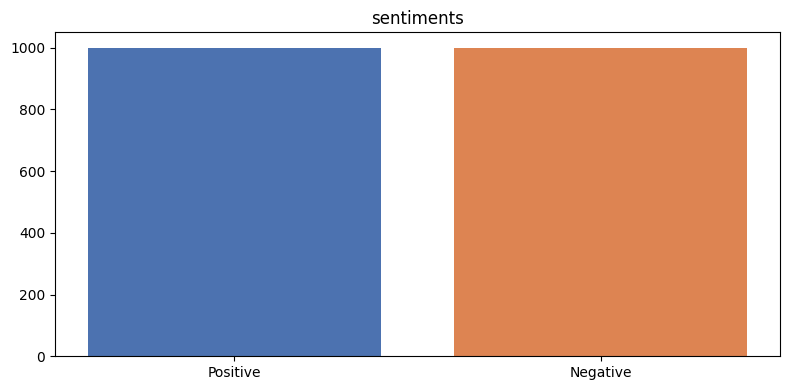

In [5]:
#dealing wiht imbalanced classes
color=sns.color_palette('deep')
plt.figure(figsize=(8,4),tight_layout=True)
plt.bar(x=['Positive','Negative'], height=review_new.value_counts(['sentiment']), color=color[:2])
plt.title('sentiments')
plt.savefig('sentiment.png')
plt.show()

In [6]:
from imblearn.under_sampling import RandomUnderSampler
r=RandomUnderSampler(random_state=0)
review_bal, review_bal['sentiment']=r.fit_resample(review_new[['review']],review_new['sentiment'])
review_bal

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
1643,Watching The Wagonmaster is not likely to resu...,positive
404,"Gamers: DR is not a fancy made movie, it's mor...",positive
1241,"Better than average World War II-era ""who-dun-...",positive
1122,This review is for the extended cut of this mo...,positive


# COMPARING THE BALANCE AND IMBALANCED DATASET

In [7]:
#comparing the balance and imbalanced dataset
print(review_new.value_counts('sentiment'))
print(review_bal.value_counts('sentiment'))
'''the data was already balanced'''

sentiment
negative    1000
positive    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


'the data was already balanced'

# SPLITTING DATA INTO TRAIN AND TEST SET

In [8]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split
train,test=train_test_split(review_bal, test_size=0.33, random_state=42)
train_x, train_y= train['review'], train['sentiment']
test_x, test_y=test['review'], test['sentiment']
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

# MODEL SELECTION

In [10]:
#model selection
'''support vector machine'''
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [11]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['Did not like the movie'])))

['positive']
['negative']


In [12]:
'''decision tree'''
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [13]:
'''naive bayes'''
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

# MODEL EVALUATION

In [18]:
#model evaluation
print(svc.score(test_x_vector, test_y))
print(tree.score(test_x_vector, test_y))
print(nb.score(test_x_vector.toarray() ,test_y))

0.8393939393939394
0.6909090909090909
0.6045454545454545


In [19]:
'''F1 score'''
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector), labels=['ppositive','negative'], average=None)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([0.        , 0.83692308])

In [20]:
'''classification report'''
from sklearn.metrics import classification_report
print(classification_report(test_y, svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.84      0.84      0.84       335
    negative       0.84      0.84      0.84       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [21]:
'''confusion matrix'''
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, svc.predict(test_x_vector), labels = ['positive', 'negative'])
conf_mat

array([[282,  53],
       [ 53, 272]], dtype=int64)